# ML TECHNIQUES

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

## DATA CLEANING AND REFINING

Custom function to detect and clean anomalies in data shown later in the dataset and generalise the data for unit conversion

In [56]:
def toMB(value):
    try :
        if 'MB' in value:
            return int(float(value.replace('MB', '').strip()))
        elif 'GB' in value:
            return int(float(value.replace('GB', '').strip()) * 1024)
        elif 'TB' in value:
            return int(float(value.replace('TB', '').strip()) * 1024 * 1024)
    except:
        print(value)
        return value
    
def conversiontoMB(data):
    data_converted = data.copy()
    data_converted['Memory'] = data['Memory'].dropna().apply(toMB)
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 32 GB", "32 GB")
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 16 GB", "16 GB")
    data_converted['Storage'] = data_converted['Storage'].dropna().apply(toMB)
    return data_converted


Reading the csv from local storage

In [59]:
data = pd.read_csv(r'mobile_sales_dataset.csv')
data

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


Checking for null values

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [61]:
data.isna().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

As we can see that there are 43,39,144 NaN values in memory,storage,rating columns respectively which has to be removed for proceeding with the process

In [62]:
data = data.dropna()
data.isna().sum()

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64

Successfully removed all invalid entries

-------------------------------------------------------------------------------

Throughout the dataset there are MB,GB,TB units for representing memory,storage conversiontoMB() helps to clean anomalies and convt <br>
all capacities to MB only for better efficiency for model training

In [63]:
data_converted = conversiontoMB(data)
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               2897 non-null   object 
 1   Models               2897 non-null   object 
 2   Colors               2897 non-null   object 
 3   Memory               2897 non-null   int64  
 4   Storage              2897 non-null   int64  
 5   Camera               2897 non-null   object 
 6   Rating               2897 non-null   float64
 7   Selling Price        2897 non-null   int64  
 8   Original Price       2897 non-null   int64  
 9   Mobile               2897 non-null   object 
 10  Discount             2897 non-null   int64  
 11  discount percentage  2897 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 294.2+ KB


In [64]:
data_converted = data_converted.drop(columns=['Camera']) #consists of only 1 unique entry for all so droping camera

## LABEL ENCODING FOR OBJECT TYPE DATA 

In [65]:
data_converted.describe(include='object')  

,Brands,Models,Colors,Mobile
count,2897,2897,2897,2897
unique,17,877,622,891
top,SAMSUNG,iPhone 11,Black,Apple iPhone 11
freq,685,36,446,36


In [66]:
categorical_columns = data_converted.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data_converted[categorical_columns] = ordinal_encoder.fit_transform(data_converted[categorical_columns]).astype(int)
data_converted.head(10)

,Brands,Models,Colors,Memory,Storage,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,13,274,349,8192,131072,4.3,19330,20999,529,1669,7.947998
1,10,44,546,2048,16384,3.8,10199,10199,398,0,0.000000
3,6,560,266,4096,65536,4.2,12999,12999,174,0,0.000000
4,1,854,45,4096,65536,4.6,49900,49900,29,0,0.000000
5,2,484,45,8,16,4.0,2199,2199,75,0,0.000000
7,1,874,134,3072,65536,4.6,42999,47900,49,4901,10.231733
8,13,325,85,1536,16384,4.2,20400,20400,577,0,0.000000
9,14,633,15,8192,131072,4.3,21736,22999,758,1263,5.491543
10,13,283,45,4096,65536,4.2,11989,11989,535,0,0.000000
11,1,854,471,4096,262144,4.6,64900,64900,29,0,0.000000


## TRAINING MODEL FOR PRICE PREDICTION USING VARIOUS ML ALGORITHMS AND FINDING THE BEST ALGORITHM SUITED FOR IT

In [67]:
features = data_converted[['Memory', 'Storage','Rating','Discount','Brands','Models','Discount','discount percentage']]
label = data_converted[['Selling Price']]

In [68]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=42)
# Reshape the target variable
y_t = y_train.values.ravel()
y_te = y_test.values.ravel()

## Linear regression

In [69]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print(f'Standard deviation of the target variable:{np.std(y_test,axis=0)}')
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test,y_predict)
print(f'Mean absolute Error: {mae}')

Root Mean Squared Error: 13795.347306763184
Standard deviation of the target variable:Selling Price    24424.647379
dtype: float64
R^2 Score: 0.6809867862405489
Mean absolute Error: 9308.907405325479


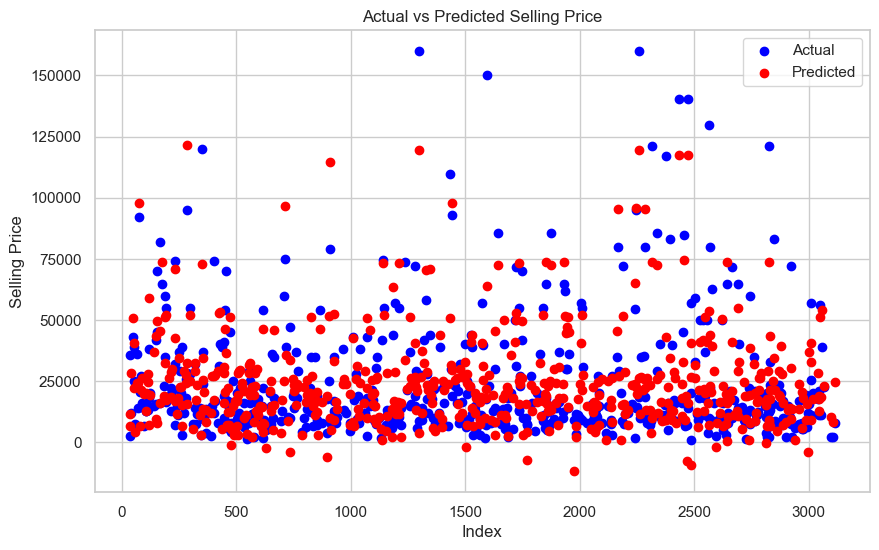

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index,y_test, color='blue', label='Actual')
plt.scatter(y_test.index,y_predict, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Selling Price')
plt.legend()
plt.title('Actual vs Predicted Selling Price')
plt.show()

## KNN

In [71]:
knn_ob = KNeighborsRegressor()
knn_ob.fit(x_train,y_train)
y_predict= knn_ob.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
r2_knn = r2_score(y_test, y_predict)
rmse_knn = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print(f'Standard deviation of the target variable:{np.std(y_test,axis=0)}')
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test,y_predict)
print(f'Mean absolute Error: {mae}')

Root Mean Squared Error: 13795.347306763184
Standard deviation of the target variable:Selling Price    24424.647379
dtype: float64
R^2 Score: 0.6809867862405489
Mean absolute Error: 5218.891724137931


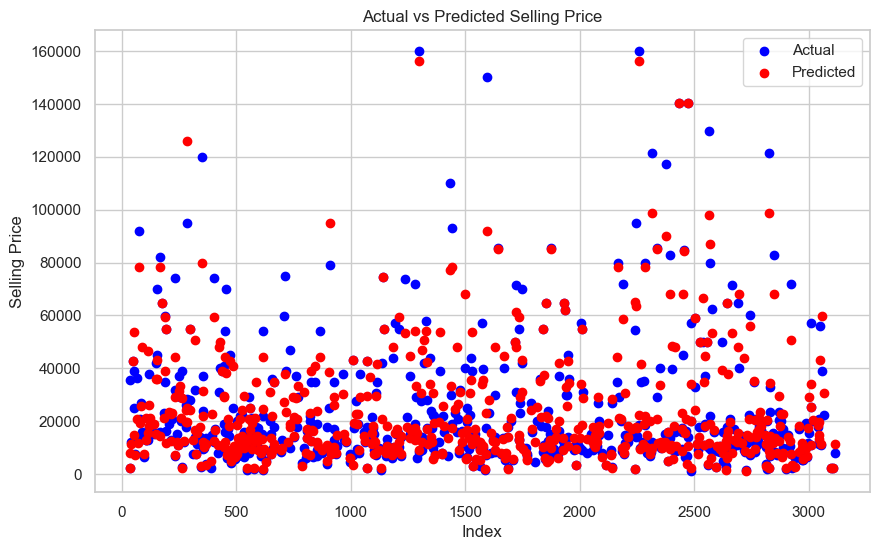

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index,y_test, color='blue', label='Actual')
plt.scatter(y_test.index,y_predict, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Selling Price')
plt.legend()
plt.title('Actual vs Predicted Selling Price')
plt.show()

## Polynomial Regression

In [73]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_train)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
X_test_poly = poly.transform(x_test)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print(f'Polynomial Regression Root Mean Squared Error: {rmse_poly}')
print(f'Standard deviation of the target variable:{np.std(y_test,axis=0)}')
print(f'Polynomial Regression R^2 Score: {r2_poly}')
mae = mean_absolute_error(y_test,y_pred_poly)
print(f'Mean absolute Error: {mae}')

Polynomial Regression Root Mean Squared Error: 13877.520207119842
Standard deviation of the target variable:Selling Price    24424.647379
dtype: float64
Polynomial Regression R^2 Score: 0.6771750207410778
Mean absolute Error: 9868.525938519604


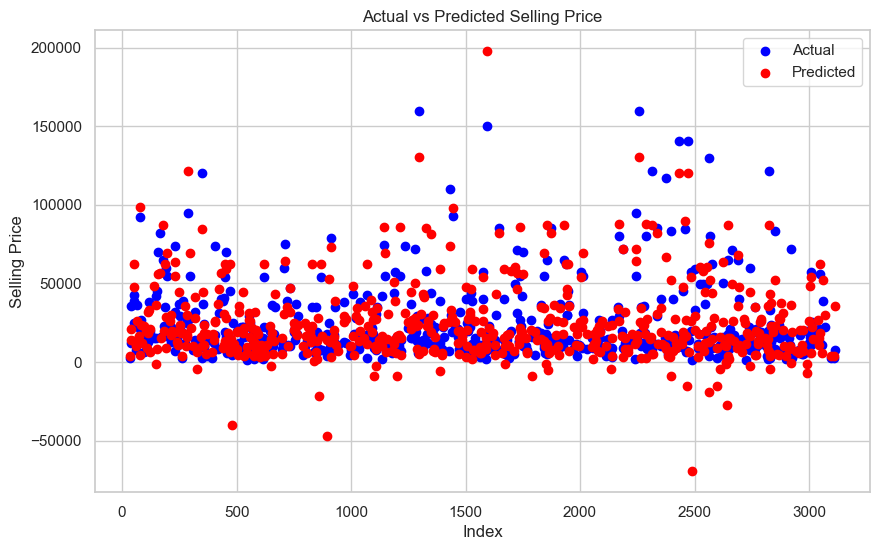

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index,y_test, color='blue', label='Actual')
plt.scatter(y_test.index,y_pred_poly, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Selling Price')
plt.legend()
plt.title('Actual vs Predicted Selling Price')
plt.show()

##  Random Forest Regression

In [75]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_t)
y_pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_te, y_pred_rf)
r2_rf = r2_score(y_te, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Random Forest Root Mean Squared Error: {rmse_rf}')
print(f'Standard deviation of the target variable:{np.std(y_te,axis=0)}')
print(f'Random Forest R^2 Score: {r2_rf}')
mae = mean_absolute_error(y_test,y_pred_rf)
print(f'Mean absolute Error: {mae}')

Random Forest Root Mean Squared Error: 5800.423693751334
Standard deviation of the target variable:24424.647379014754
Random Forest R^2 Score: 0.9436021132872057
Mean absolute Error: 2719.612006149215


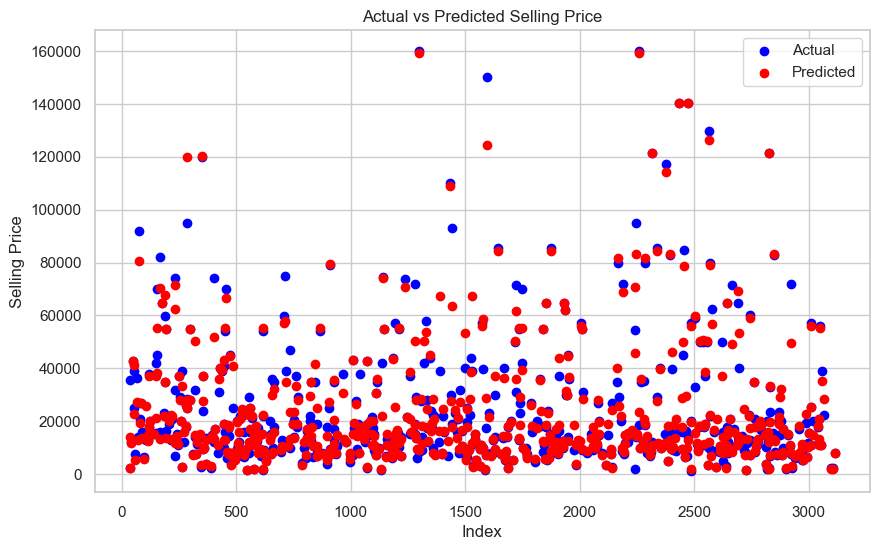

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index,y_test, color='blue', label='Actual')
plt.scatter(y_test.index,y_pred_rf, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Selling Price')
plt.legend()
plt.title('Actual vs Predicted Selling Price')
plt.show()

## AdaBoost Regression

In [77]:
base_estimator = DecisionTreeRegressor(max_depth=3)
ada = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=42)
ada.fit(x_train, y_t)
y_pred_ada = ada.predict(x_test)
mse_ada = mean_squared_error(y_te, y_pred_ada)
r2_ada = r2_score(y_te, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)

print(f'AdaBoost Root Mean Squared Error: {rmse_ada}')
print(f'Standard deviation of the target variable:{np.std(y_te,axis=0)}')
print(f'AdaBoost R^2 Score: {r2_ada}')
mae = mean_absolute_error(y_test,y_pred_ada)
print(f'Mean absolute Error: {mae}')

AdaBoost Root Mean Squared Error: 17912.208359829605
Standard deviation of the target variable:24424.647379014754
AdaBoost R^2 Score: 0.46217416531607225
Mean absolute Error: 16885.438278223337


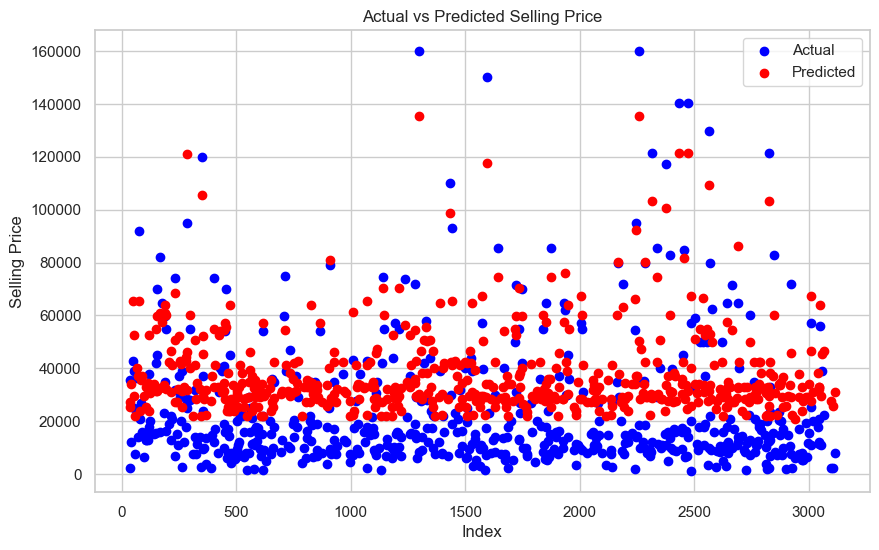

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index,y_test, color='blue', label='Actual')
plt.scatter(y_test.index,y_pred_ada, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Selling Price')
plt.legend()
plt.title('Actual vs Predicted Selling Price')
plt.show()

#### COMPARING ALGORITHM ACCURACY

In [79]:
ml_models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Polynomial Regression', 'Random Forest', 'AdaBoost'],
    'RMSE': [rmse, rmse_knn, rmse_poly, rmse_rf, rmse_ada],
    'R^2': [r2, r2_knn, r2_poly, r2_rf, r2_ada]
})
ml_models

,Model,RMSE,R^2
0,Linear Regression,13795.347307,0.680987
1,KNN,9325.681502,0.854218
2,Polynomial Regression,13877.520207,0.677175
3,Random Forest,5800.423694,0.943602
4,AdaBoost,17912.208360,0.462174


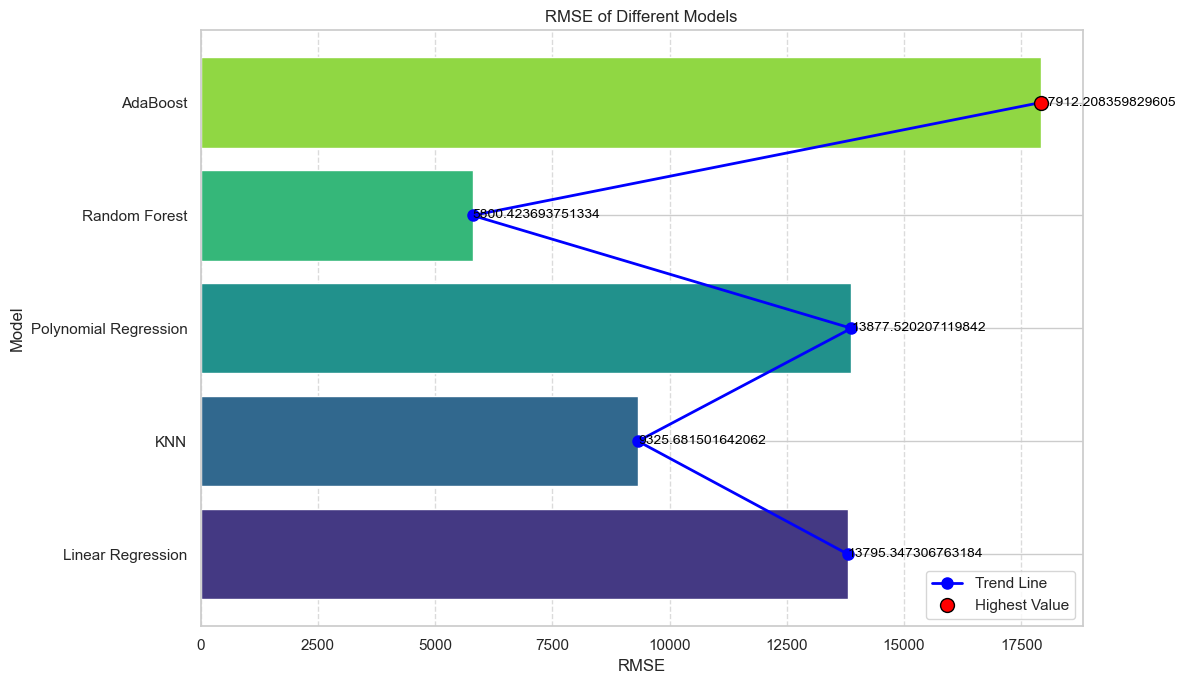

In [80]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title('RMSE of Different Models')

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(ml_models))
bars = plt.barh(ml_models['Model'], ml_models['RMSE'], color=custom_palette)

# Add a trend line
x = np.arange(len(ml_models))
plt.plot(ml_models['RMSE'], x, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

# Mark the highest value
max_value = ml_models['RMSE'].max()
max_index = ml_models['Model'][ml_models['RMSE'].idxmax()]
plt.scatter(max_value, ml_models['Model'][ml_models['RMSE'].idxmax()], color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

# Add a legend
plt.legend()

# Customize x-axis and y-axis labels
plt.xlabel('RMSE')
plt.ylabel('Model')

# Show the plot
plt.tight_layout()
plt.show()

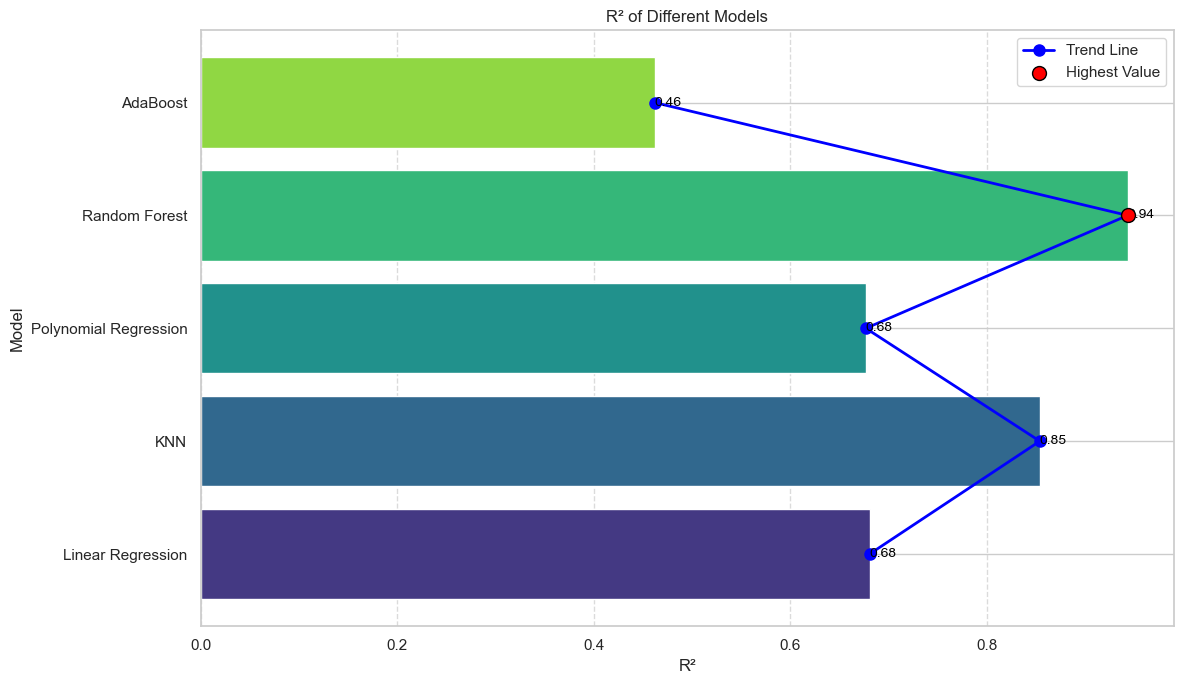

In [81]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title('R² of Different Models')

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(ml_models))
bars = plt.barh(ml_models['Model'], ml_models['R^2'], color=custom_palette)

# Add a trend line
x = np.arange(len(ml_models))
plt.plot(ml_models['R^2'], x, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10, color='black')

# Mark the highest value
max_value = ml_models['R^2'].max()
max_index = ml_models['Model'][ml_models['R^2'].idxmax()]
plt.scatter(max_value, ml_models['Model'][ml_models['R^2'].idxmax()], color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

# Add a legend
plt.legend()

# Customize x-axis and y-axis labels
plt.xlabel('R²')
plt.ylabel('Model')

# Show the plot
plt.tight_layout()
plt.show()
